In [3]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
from collections import Counter
import math

Average Entropy (AE) của Q1: 0.8643297071195146
Information Gain (IG) của Q1: 0.057665995974926054


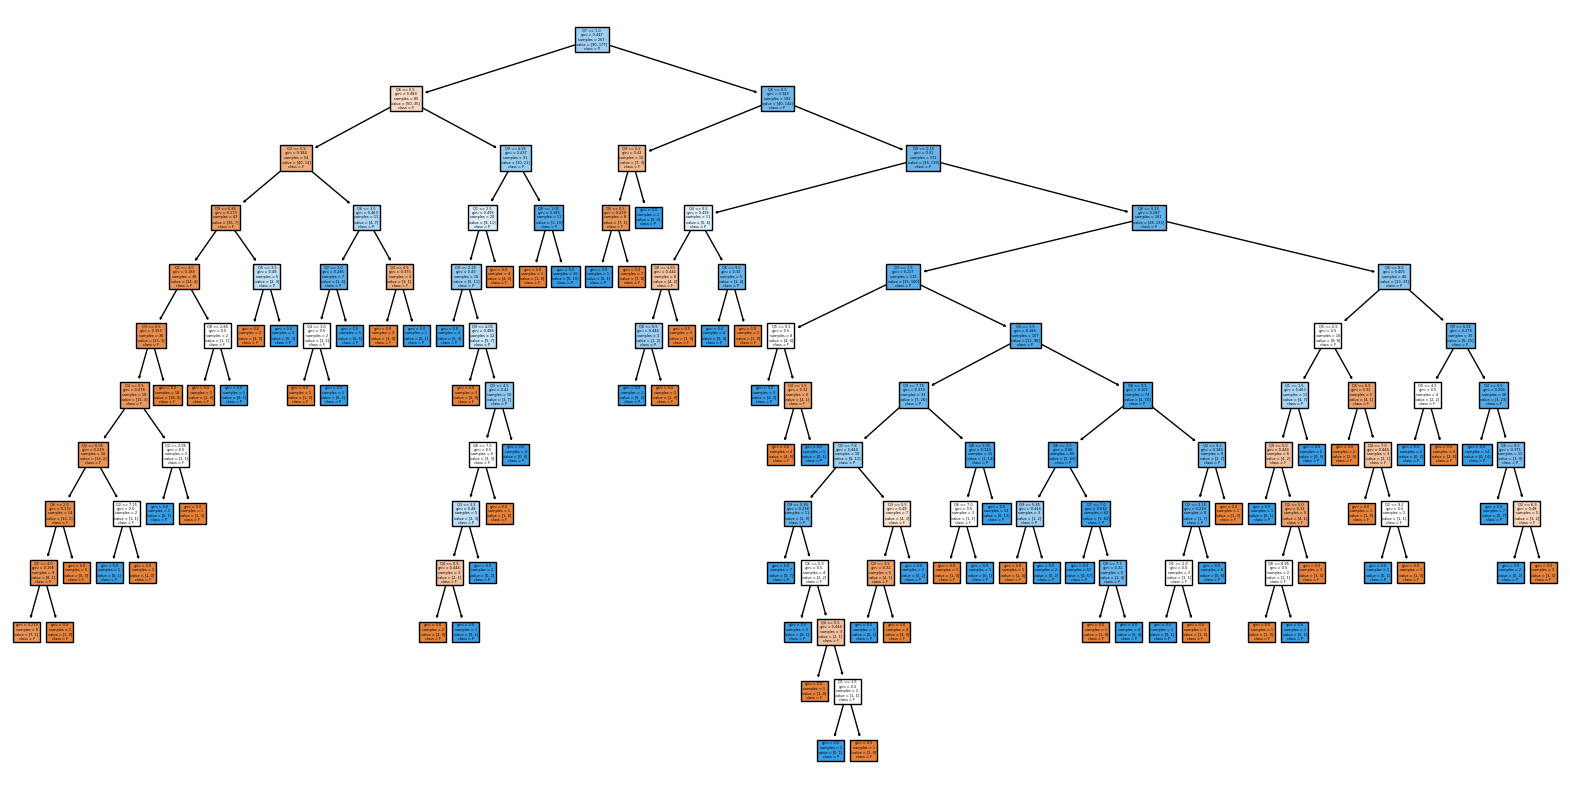

In [2]:
# Đọc dữ liệu từ file CSV
file_path = "./dt_data.csv"
df = pd.read_csv(file_path)

# Xóa cột không cần thiết
df = df.drop(columns=["Unnamed: 11"])


# Tính Entropy của một thuộc tính
def calculate_entropy(attribute):
    counts = Counter(attribute)
    total = len(attribute)
    entropy = -sum(
        (count / total) * math.log2(count / total) for count in counts.values()
    )
    return entropy


# Tính Average Entropy và Information Gain
def calculate_ae_ig(df, target, attribute):
    target_entropy = calculate_entropy(df[target])
    values = df[attribute].unique()
    ae = sum(
        (len(df[df[attribute] == value]) / len(df))
        * calculate_entropy(df[df[attribute] == value][target])
        for value in values
    )
    ig = target_entropy - ae
    return ae, ig

# attributes = ["Q1", "Q2", "Q3", "Q4", "Q5", "Q6", "Q7", "Q8", "Q9"]

# for attribute in attributes:
#     ae, ig = calculate_ae_ig(df, "Rank", attribute)
#     print(f"Entropy {attribute}: {calculate_entropy(df['Rank'])}")
#     print(f"Average Entropy (AE) của {attribute}: {ae}")
#     print(f"Information Gain (IG) của {attribute}: {ig}")
#     print()

# Nhập tên thuộc tính và tính toán
attribute = input("Nhập tên thuộc tính điểm số (ví dụ: Q1): ")
ae, ig = calculate_ae_ig(df, "Rank", attribute)
print(f"Average Entropy (AE) của {attribute}: {ae}")
print(f"Information Gain (IG) của {attribute}: {ig}")

# Cài đặt và huấn luyện mô hình Decision Tree
X = df.drop(columns=["#", "Rank"])
y = df["Rank"]
model = DecisionTreeClassifier()
model.fit(X, y)

# Đánh giá và trực quan hóa cây quyết định
plt.figure(figsize=(20, 10))
plot_tree(
    model,
    feature_names=X.columns,
    class_names=[str(c) for c in model.classes_],
    filled=True,
)
plt.show()

In [10]:
import pandas as pd
from collections import Counter
import math

# Đọc dữ liệu từ file CSV
file_path = './dt_data.csv'
df = pd.read_csv(file_path)

# Xóa cột không cần thiết
df = df.drop(columns=['Unnamed: 11'])

# Tính Entropy của một thuộc tính
def calculate_entropy(attribute):
    counts = Counter(attribute)
    total = len(attribute)
    entropy = -sum((count/total) * math.log2(count/total) for count in counts.values())
    return entropy

# Tính Average Entropy và Information Gain
def calculate_ae_ig(df, target, attribute):
    target_entropy = calculate_entropy(df[target])
    values = df[attribute].unique()
    ae = sum((len(df[df[attribute] == value]) / len(df)) * calculate_entropy(df[df[attribute] == value][target]) for value in values)
    ig = target_entropy - ae
    return ae, ig

# Tính toán cho thuộc tính Q1
attribute = 'Q2'
entropy_rank = calculate_entropy(df['Rank'])
ae, ig = calculate_ae_ig(df, 'Rank', attribute)

# Kiểm tra các điều kiện
valid = True

# Entropy và AE phải không âm
if entropy_rank < 0 or ae < 0:
    valid = False
    print("Lỗi: Giá trị entropy hoặc average entropy âm")

# Information Gain phải không âm
if ig < 0:
    valid = False
    print("Lỗi: Giá trị information gain âm")

# Information Gain phải nhỏ hơn hoặc bằng entropy ban đầu
if ig > entropy_rank:
    valid = False
    print("Lỗi: Giá trị information gain lớn hơn entropy ban đầu")

if valid:
    print(f"Entropy (H) của Rank: {entropy_rank}")
    print(f"Average Entropy (AE) của {attribute}: {ae}")
    print(f"Information Gain (IG) của {attribute}: {ig}")
else:
    print("Kết quả không thoả mãn các điều kiện")

Entropy (H) của Rank: 0.9219957030944407
Average Entropy (AE) của Q2: 0.7616877890146895
Information Gain (IG) của Q2: 0.1603079140797512


CART

In [ ]:
# column_name = df.columns[2:]
# gini = dict()
# for i in column_name:
#     _, ig = calculate_ae_ig(df, 'Rank', i)
#     value = 1 - ig
#     gini.update({i: value})
# print(gini)




      0    1   2   3   4   5   6    7    8     9
0    Q1   Q2  Q3  Q4  Q5  Q6  Q7   Q8   Q9  Rank
1     0    0   0   0   2   6   0  6.4  6.4     F
2     0    4   0   0   2   5   0  6.4  2.7     F
3     3    8   5   4   3   9   4  8.6  6.4     P
4     0   10   0   1   0   7   4  7.9  9.1     P
..   ..  ...  ..  ..  ..  ..  ..  ...  ...   ...
263   0  4.1   7   1   5   6   0    0  9.1     F
264   3    6   7   2   2   0   0    5    0     P
265   4    8   0   2   5   9   4  9.3  7.3     P
266   1    0   1   0   1  10   0    0    0     P
267   2    4   6   1   3   8   4  5.7  7.3     F

[268 rows x 10 columns]


TypeError: slice indices must be integers or None or have an __index__ method